In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os 
os.chdir("drive/MyDrive/02456-protein-project2020/notebooks")

Mounted at /content/drive


In [2]:
! pip install Biopython

     |████████████████████████████████| 2.3MB 6.0MB/s 


# Visualize basic aspects of embeddings 

In [29]:
# import general libraries
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.manifold import TSNE
import seaborn as sns 

In [4]:
######## Fill out here to explore new embeddings! ############

PATH = "embeddings/emb_BL-cytoC_mix_b_32_train13252_iter300_hidden50.pth"
hidden_size=50
emb=torch.load(PATH, map_location=torch.device('cpu'))


In [5]:
test_info = emb["metadata"]
emb_max2D = emb["emb_max2D"]
emb_mean2D = emb["emb_mean2D"]
emb_last2D = emb["emb_last2D"]

In [6]:
test_info.columns

Index(['Entry', 'Entry name', 'Status', 'Protein names', 'Gene names',
       'Organism', 'Length', 'Protein families', 'Taxonomic lineage (ALL)',
       'Gene ontology (biological process)',
       'Gene ontology (cellular component)', 'Gene ontology (GO)',
       'Gene ontology (molecular function)', 'Gene ontology IDs',
       'Taxonomic lineage (CLASS)', 'Taxonomic lineage (FAMILY)',
       'Taxonomic lineage (FORMA)', 'Taxonomic lineage (GENUS)',
       'Taxonomic lineage (INFRACLASS)', 'Taxonomic lineage (all)',
       'Beta strand', 'Helix', 'Turn', 'Mass', 'Cross-reference (Pfam)',
       'Sequence', 'Taxonomic lineage (PHYLUM)', 'seq_len'],
      dtype='object')

In [7]:
test_info["Taxonomic lineage (all) splitted"]=test_info["Taxonomic lineage (all)"].str.split(", ")

# get the different taxonomic levels for plotting
level3=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[2])
level2=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[1])
level4=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[3])



test_info["Protein families"].value_counts()

Cytochrome c family                                                  444
Hcp beta-lactamase family                                            111
Cytochrome c family, PsbV subfamily                                  102
Class-A beta-lactamase family                                         98
Metallo-beta-lactamase superfamily, Glyoxalase II family              95
Peptidase S12 family, YfeW subfamily                                  95
Cytochrome c family, PetJ subfamily                                   94
Class-C beta-lactamase family                                         94
LysR transcriptional regulatory family                                87
Binding-protein-dependent transport system permease family            86
Class-D beta-lactamase family                                         84
Metallo-beta-lactamase superfamily, Class-B beta-lactamase family     83
Name: Protein families, dtype: int64

Text(0, 0.5, 'y axis')

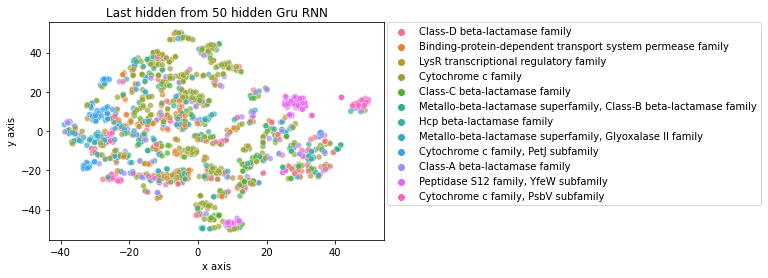

In [8]:
# visualize pfam 
sns.scatterplot(x=emb_max2D[:,0], y=emb_max2D[:,1], alpha=0.7, hue=test_info["Protein families"], legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Last hidden from {} hidden Gru RNN".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")

Text(0, 0.5, 'y axis')

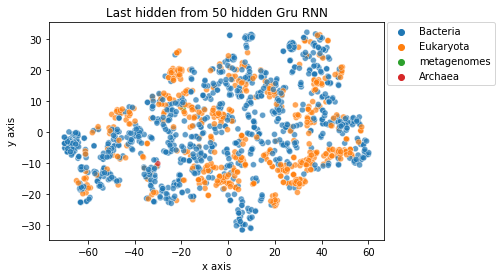

In [ ]:
# visualize kingdom
sns.scatterplot(x=emb_last2D[:,0], y=emb_last2D[:,1], alpha=0.7, hue=level2, legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Last hidden from {} hidden Gru RNN".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")

Text(0, 0.5, 'y axis')

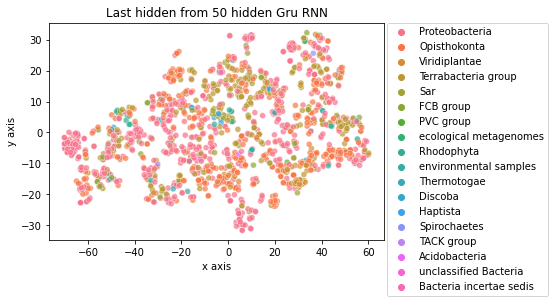

In [9]:
# visualize taxon
sns.scatterplot(x=emb_last2D[:,0], y=emb_last2D[:,1], alpha=0.7, hue=level3, legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Last hidden from {} hidden Gru RNN".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")

Text(0, 0.5, 'y axis')

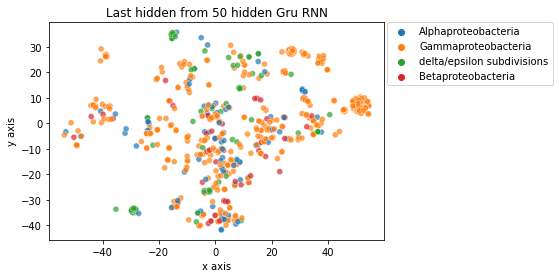

In [10]:
# select a specific group to plot 
group="Proteobacteria"
idx=[i for i, e in enumerate(level3) if e == group]

sns.scatterplot(x=emb_mean2D[idx,0], y=emb_mean2D[idx,1], alpha=0.7, hue=level4[idx], legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Last hidden from {} hidden Gru RNN".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")

# Explore specific embeddings


**Beta-lactamase900 balanced**

In [11]:
PATH = "embeddings/emb_BL-pfam_b_32_train7290_epoch30_hidden500.pth"
hidden_size=500
emb=torch.load(PATH, map_location=torch.device('cpu'))

test_info = emb["metadata"]
emb_max2D = emb["emb_max2D"]
emb_mean2D = emb["emb_mean2D"]
emb_last2D = emb["emb_last2D"]

In [12]:
test_info.columns

Index(['Entry', 'Entry name', 'Status', 'Protein names', 'Gene names',
       'Organism', 'Length', 'Protein families', 'Taxonomic lineage (ALL)',
       'Gene ontology (biological process)',
       'Gene ontology (cellular component)', 'Gene ontology (GO)',
       'Gene ontology (molecular function)', 'Gene ontology IDs',
       'Taxonomic lineage (CLASS)', 'Taxonomic lineage (FAMILY)',
       'Taxonomic lineage (FORMA)', 'Taxonomic lineage (GENUS)',
       'Taxonomic lineage (INFRACLASS)', 'Taxonomic lineage (all)',
       'Beta strand', 'Helix', 'Turn', 'Mass', 'Cross-reference (Pfam)',
       'Sequence', 'Taxonomic lineage (PHYLUM)', 'seq_len'],
      dtype='object')

In [13]:
test_info["Taxonomic lineage (all) splitted"]=test_info["Taxonomic lineage (all)"].str.split(", ")

# get the different taxonomic levels for plotting
level3=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[2])
level2=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[1])
level4=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[3])



test_info["Protein families"].value_counts()

Hcp beta-lactamase family                                            102
Binding-protein-dependent transport system permease family            98
Peptidase S12 family, YfeW subfamily                                  93
Class-A beta-lactamase family                                         91
Metallo-beta-lactamase superfamily, Glyoxalase II family              90
LysR transcriptional regulatory family                                87
Class-C beta-lactamase family                                         87
Metallo-beta-lactamase superfamily, Class-B beta-lactamase family     82
Class-D beta-lactamase family                                         80
Name: Protein families, dtype: int64

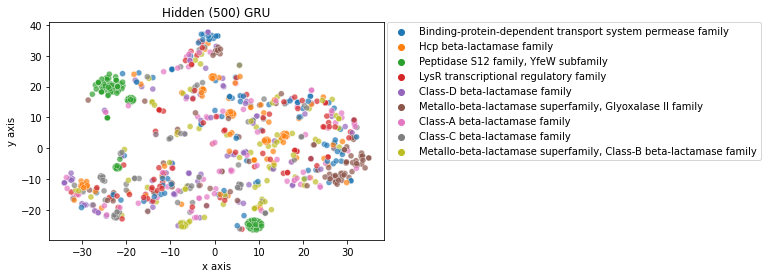

In [14]:
# visualize pfam 
sns.scatterplot(x=emb_mean2D[:,0], y=emb_mean2D[:,1], alpha=0.7, hue=test_info["Protein families"], legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Hidden ({}) GRU".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.savefig("visualization/embedding/mean_hidden_(500)_GRU_BL900", bbox_inches = "tight")

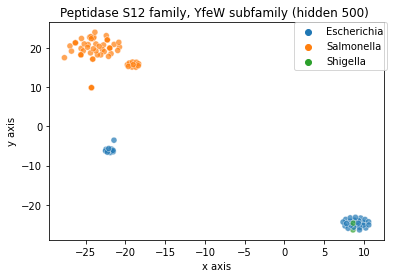

In [15]:
# select a specific group to plot 
group="Peptidase S12 family, YfeW subfamily"
idx=[i for i, e in enumerate(test_info["Protein families"]) if e == group]

sns.scatterplot(x=emb_mean2D[idx,0], y=emb_mean2D[idx,1], alpha=0.7, hue=test_info['Taxonomic lineage (GENUS)'][idx], legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Peptidase S12 family, YfeW subfamily (hidden {}) ".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.savefig("visualization/embedding/mean_1subfam_hidden_(500)_GRU_BL900", bbox_inches = "tight")

**Comparing embeddings with different hidden dim**

When considering only proteo bacteria and plotting taxlevel 3 we found that the network seem to cluster the proteins in accordance with taxonomy.





**Hidden dimension 500**

In [30]:
PATH = "embeddings/emb_BL-cytoC_mix_b_32_train13252_iter300_hidden500.pth"
hidden_size=500
emb=torch.load(PATH, map_location=torch.device('cpu'))

test_info = emb["metadata"]
emb_max2D = emb["emb_max2D"]
emb_mean2D = emb["emb_mean2D"]
emb_last2D = emb["emb_last2D"]

In [31]:
test_info["Taxonomic lineage (all) splitted"]=test_info["Taxonomic lineage (all)"].str.split(", ")

# get the different taxonomic levels for plotting
level3=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[2])
level2=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[1])
#level4=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[3])

test_info["Protein families"].value_counts()

Cytochrome c family                                                  414
Cytochrome c family, PsbV subfamily                                  125
LysR transcriptional regulatory family                               103
Cytochrome c family, PetJ subfamily                                  100
Class-A beta-lactamase family                                         99
Class-D beta-lactamase family                                         98
Peptidase S12 family, YfeW subfamily                                  98
Hcp beta-lactamase family                                             96
Metallo-beta-lactamase superfamily, Class-B beta-lactamase family     94
Binding-protein-dependent transport system permease family            86
Class-C beta-lactamase family                                         80
Metallo-beta-lactamase superfamily, Glyoxalase II family              80
Name: Protein families, dtype: int64

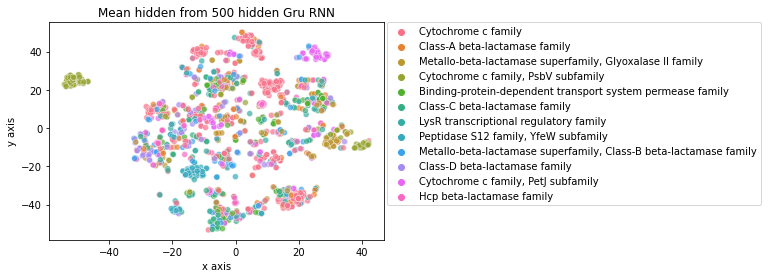

In [32]:
# visualize pfam 
sns.scatterplot(x=emb_mean2D[:,0], y=emb_mean2D[:,1], alpha=0.7, hue=test_info["Protein families"], legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Mean hidden from {} hidden Gru RNN".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.savefig("visualization/embedding/mean_hidden_(500)_GRU_mix_pfam", bbox_inches = "tight")

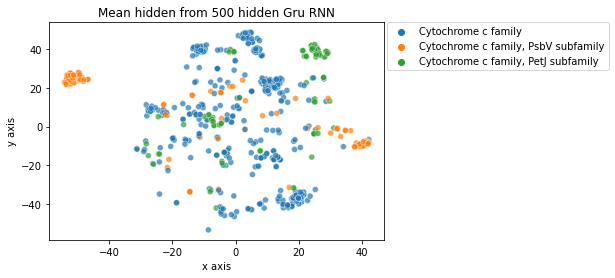

In [34]:
# select a specific group to plot 
group=["Cytochrome c family, PsbV subfamily", "Cytochrome c family", "Cytochrome c family, PetJ subfamily"]
idx=[i for i, e in enumerate(test_info["Protein families"]) if e in group]
len(idx)
sns.scatterplot(x=emb_mean2D[idx,0], y=emb_mean2D[idx,1], alpha=0.7, hue=test_info['Protein families'][idx], legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Mean hidden from {} hidden Gru RNN".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.savefig("visualization/embedding/mean_hidden_(500)_GRU_cytoC_pfam", bbox_inches = "tight")

**Hidden dimension 50**


In [20]:
PATH = "embeddings/emb_BL-cytoC_mix_b_32_train13252_iter300_hidden50.pth"
hidden_size=50
emb=torch.load(PATH, map_location=torch.device('cpu'))

test_info = emb["metadata"]
emb_max2D = emb["emb_max2D"]
emb_mean2D = emb["emb_mean2D"]
emb_last2D = emb["emb_last2D"]

In [21]:
test_info["Taxonomic lineage (all) splitted"]=test_info["Taxonomic lineage (all)"].str.split(", ")

# get the different taxonomic levels for plotting
level3=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[2])
level2=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[1])
#level4=np.array(list(zip(*list(test_info["Taxonomic lineage (all) splitted"])))[3])

test_info["Protein families"].value_counts()

Cytochrome c family                                                  444
Hcp beta-lactamase family                                            111
Cytochrome c family, PsbV subfamily                                  102
Class-A beta-lactamase family                                         98
Metallo-beta-lactamase superfamily, Glyoxalase II family              95
Peptidase S12 family, YfeW subfamily                                  95
Cytochrome c family, PetJ subfamily                                   94
Class-C beta-lactamase family                                         94
LysR transcriptional regulatory family                                87
Binding-protein-dependent transport system permease family            86
Class-D beta-lactamase family                                         84
Metallo-beta-lactamase superfamily, Class-B beta-lactamase family     83
Name: Protein families, dtype: int64

Text(0, 0.5, 'y axis')

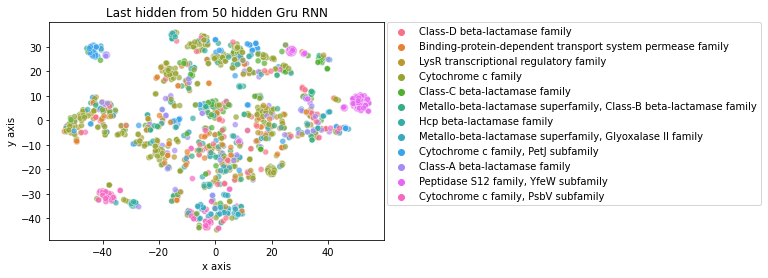

In [22]:
# visualize pfam 
sns.scatterplot(x=emb_mean2D[:,0], y=emb_mean2D[:,1], alpha=0.7, hue=test_info["Protein families"], legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Last hidden from {} hidden Gru RNN".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")

Text(0, 0.5, 'y axis')

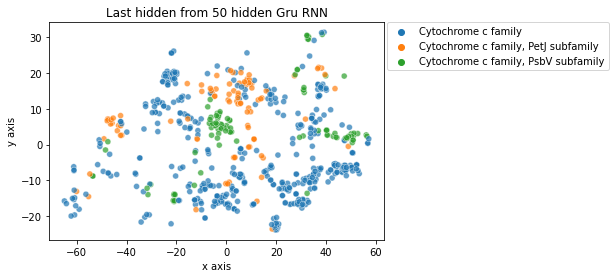

In [23]:
# select a specific group to plot 
group=["Cytochrome c family, PsbV subfamily", "Cytochrome c family", "Cytochrome c family, PetJ subfamily"]
idx=[i for i, e in enumerate(test_info["Protein families"]) if e in group]
len(idx)
sns.scatterplot(x=emb_last2D[idx,0], y=emb_last2D[idx,1], alpha=0.7, hue=test_info['Protein families'][idx], legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Last hidden from {} hidden Gru RNN".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")

Text(0, 0.5, 'y axis')

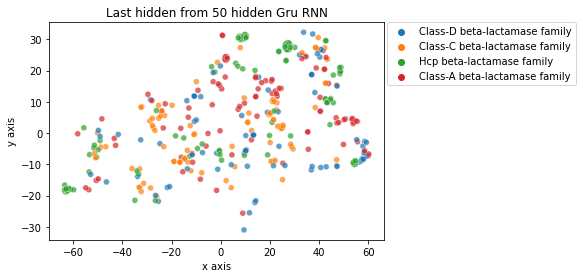

In [25]:
group=["Hcp beta-lactamase family", "Class-A beta-lactamase family", "Class-C beta-lactamase family", "Class-D beta-lactamase family"]
idx=[i for i, e in enumerate(test_info["Protein families"]) if e in group]
len(idx)
sns.scatterplot(x=emb_last2D[idx,0], y=emb_last2D[idx,1], alpha=0.7, hue=test_info['Protein families'][idx], legend=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Last hidden from {} hidden Gru RNN".format(hidden_size))
plt.xlabel("x axis")
plt.ylabel("y axis")